<a href="https://colab.research.google.com/github/aayalas/Python_para_Data_Science_Pandas/blob/main/Python_ML_Intro_Data_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('carros.csv')
data.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
#Data sorted as worst way (disorder)
data_sort = data.sort_values('vendido', ascending = True)
x_sort = data_sort[['precio', 'edad_del_modelo', 'km_by_year']]
y_sort = data_sort[['vendido']]
data_sort.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

model = DummyClassifier()
results = cross_validate(model, x_sort, y_sort, cv = 10, return_train_score = False)
media = results['test_score'].mean()
standard_deviation = results['test_score'].std()
print("Accuracy with dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * standard_deviation)*100, (media + 2 * standard_deviation) * 100))

Accuracy with dummy stratified, 10 = [58.00, 58.00]


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model, x_sort, y_sort, cv = 10, return_train_score = False)
media = results['test_score'].mean()
standard_deviation = results['test_score'].std()
print("Accuracy with dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * standard_deviation)*100, (media + 2 * standard_deviation) * 100))

Accuracy with dummy stratified, 10 = [73.83, 77.73]


In [5]:
#Generating random data from car model
np.random.seed(SEED)
data['model'] = data.edad_del_modelo + np.random.randint(-2, 3, size = 10000)
data.model = data.model + abs(data.model.min()) + 1
data.head()

,precio,vendido,edad_del_modelo,km_by_year,model
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def print_results(results):
  media = results['test_score'].mean() * 100
  deviation = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Interval [%.2f, %.2f]" % (media - 2 * deviation, media + 2 * deviation))

In [7]:
#GroupKFold for analyze on how the model behave with new groups

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = False)
print_results(results)

Accuracy media 75.78
Interval [73.67, 77.90]


In [8]:
#GroupKFold on a Pipline with StandarScaler and SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model = SVC()

pipeline = Pipeline([('Transformation', scaler), ('Estimator', model)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = False)
print_results(results)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy media 76.68
Interval [74.28, 79.08]


In [9]:
#GroupKFold for analyze on how the model behave with new groups

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = False)
print_results(results)

Accuracy media 75.78
Interval [73.67, 77.90]


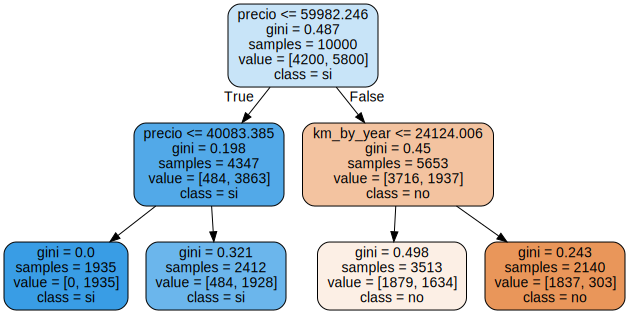

In [10]:
from sklearn.tree import export_graphviz
import graphviz

model.fit(x_sort, y_sort)
features = x_sort.columns
dot_data = export_graphviz(model, out_file = None, filled = True, rounded = True, class_names = ['no', 'si'], feature_names = features);
graph = graphviz.Source(dot_data);
graph

In [11]:
#GroupKFold for analyze on how the model behave with new groups

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth = 3)
results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = False)
print_results(results)

Accuracy media 78.67
Interval [76.40, 80.94]


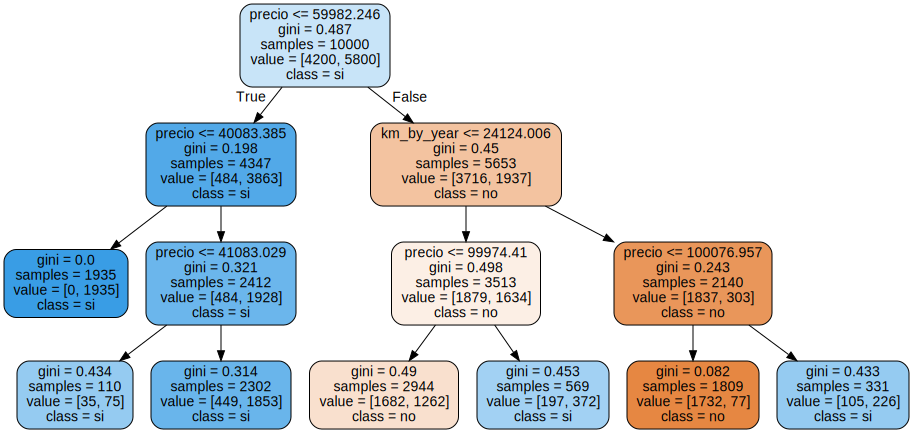

In [12]:
from sklearn.tree import export_graphviz
import graphviz

model.fit(x_sort, y_sort)
features = x_sort.columns
dot_data = export_graphviz(model, out_file = None, filled = True, rounded = True, class_names = ['no', 'si'], feature_names = features);
graph = graphviz.Source(dot_data);
graph

In [13]:
#GroupKFold for analyze on how the model behave with new groups

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth = 10)
results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = False)
print_results(results)

Accuracy media 77.19
Interval [75.26, 79.13]


## **Testing Parameters**

In [14]:
def init_decision_tree(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = True)
  test_score = results['test_score'].mean() * 100
  train_score = results['train_score'].mean() * 100
  print('Tree max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tab = [max_depth, train_score, test_score]
  return tab

result = [init_decision_tree(i) for i in range(1, 33)]
result = pd.DataFrame(result, columns = ['max_depth', 'train', 'test'])
result.head()

Tree max_depth = 1, training = 75.79, testing = 75.78
Tree max_depth = 2, training = 75.79, testing = 75.78
Tree max_depth = 3, training = 78.75, testing = 78.67
Tree max_depth = 4, training = 78.79, testing = 78.63
Tree max_depth = 5, training = 78.94, testing = 78.56
Tree max_depth = 6, training = 79.17, testing = 78.12
Tree max_depth = 7, training = 79.50, testing = 77.96
Tree max_depth = 8, training = 79.89, testing = 77.86
Tree max_depth = 9, training = 80.46, testing = 77.38
Tree max_depth = 10, training = 81.16, testing = 77.19
Tree max_depth = 11, training = 82.03, testing = 76.97
Tree max_depth = 12, training = 82.89, testing = 76.49
Tree max_depth = 13, training = 83.95, testing = 75.81
Tree max_depth = 14, training = 85.03, testing = 75.66
Tree max_depth = 15, training = 86.14, testing = 75.16
Tree max_depth = 16, training = 87.19, testing = 75.11
Tree max_depth = 17, training = 88.31, testing = 74.74
Tree max_depth = 18, training = 89.26, testing = 74.33
Tree max_depth = 19

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


# **Overfit**



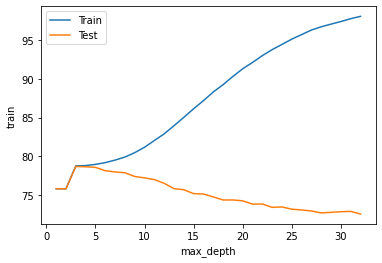

In [15]:
#Overfit Case
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x = 'max_depth', y = 'train', data = result);
sns.lineplot(x = 'max_depth', y = 'test', data = result);
plt.legend(['Train', 'Test'])

In [16]:
result.sort_values('test', ascending = False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# **Two Dimension Hyperparameters**

In [18]:
def init_decision_tree(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = True)
  test_score = results['test_score'].mean() * 100
  train_score = results['train_score'].mean() * 100
  print('Tree max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tab = [max_depth, min_samples_leaf, train_score, test_score]
  return tab

def search():
  result = []
  for max_depth in range(1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tab = init_decision_tree(max_depth, min_samples_leaf)
      result.append(tab)
  result = pd.DataFrame(result, columns =['max_depth', 'min_samples_leaf', 'train', 'test'])
  return result

result = search()
result.head()

Tree max_depth = 1, min_samples_leaf = 32, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 32, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Tree max_depth = 3, min_samples_leaf = 32, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Tree max_depth = 4, min_samples_leaf = 32, training = 78.75, testing =

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [19]:
result.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


# **Correlation Matrix**

In [20]:
corr = result.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples_leaf,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


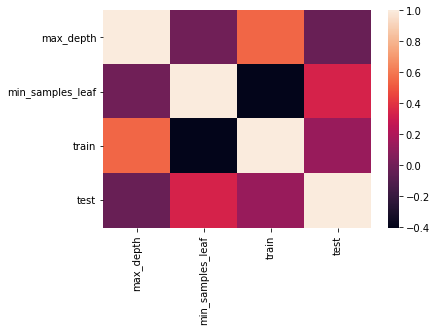

In [21]:
sns.heatmap(corr);

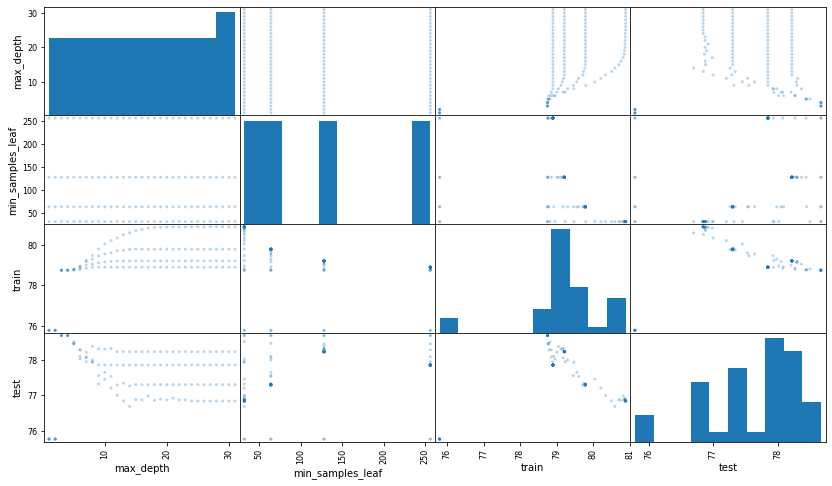

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(result, figsize = (14, 8), alpha = 0.3);

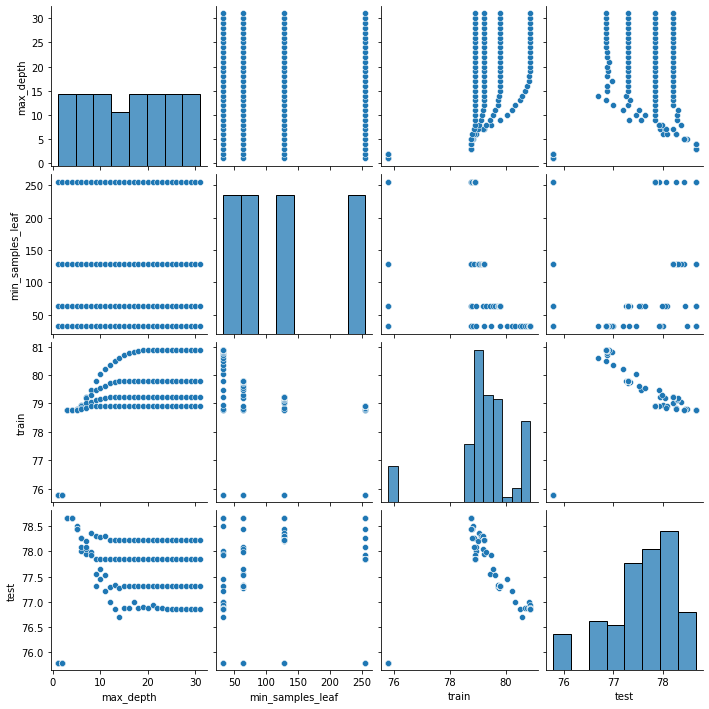

In [23]:
sns.pairplot(result);

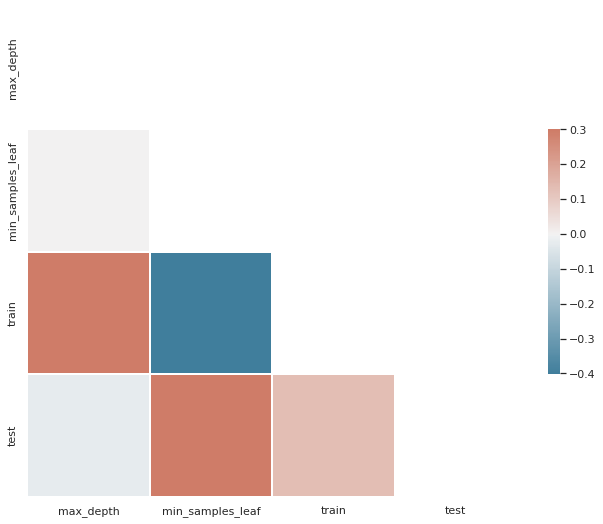

In [24]:
#Seaborn Correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = "white");

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool));

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9));

#Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True);

#Draw the heatmap with the mask and corerct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5});

In [25]:
def search():
  result = []
  for max_depth in range(1, 10):
    for min_samples_leaf in [128, 190, 220, 256]:
      tab = init_decision_tree(max_depth, min_samples_leaf)
      result.append(tab)
  result = pd.DataFrame(result, columns =['max_depth', 'min_samples_leaf', 'train', 'test'])
  return result

result = search()
result.head()

Tree max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 190, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 220, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 190, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 220, training = 75.79, testing = 75.78
Tree max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Tree max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 190, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 220, training = 78.75, testing = 78.67
Tree max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Tree max_depth = 4, min_samples_leaf = 128, training = 78.75, te

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [26]:
result.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


# **Three Dimensional Hyper Parameters**

In [28]:
def init_decision_tree(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(model, x_sort, y_sort, cv = cv, groups = data.model, return_train_score = True)
  test_score = results['test_score'].mean() * 100
  train_score = results['train_score'].mean() * 100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  print('Tree max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tab = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tab

def search():
  result = []
  for max_depth in range(1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tab = init_decision_tree(max_depth, min_samples_leaf, min_samples_split)
        result.append(tab)
  result = pd.DataFrame(result, columns =['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return result

result = search()
result.head()

Tree max_depth = 1, min_samples_leaf = 32, min_samples_split = 32, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 32, min_samples_split = 64, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 32, min_samples_split = 128, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 32, min_samples_split = 256, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 64, min_samples_split = 32, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 64, min_samples_split = 64, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 64, min_samples_split = 128, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 64, min_samples_split = 256, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 128, min_samples_split = 32, training = 75.79, testing = 75.78
Tree max_depth = 1, min_samples_leaf = 128, min_samples_split = 64, training = 75.79, 

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006891,0.001772
1,1,32,64,75.791169,75.784219,0.006928,0.001813
2,1,32,128,75.791169,75.784219,0.006425,0.001979
3,1,32,256,75.791169,75.784219,0.007165,0.001878
4,1,64,32,75.791169,75.784219,0.006873,0.002118


In [29]:
corr = result.corr()

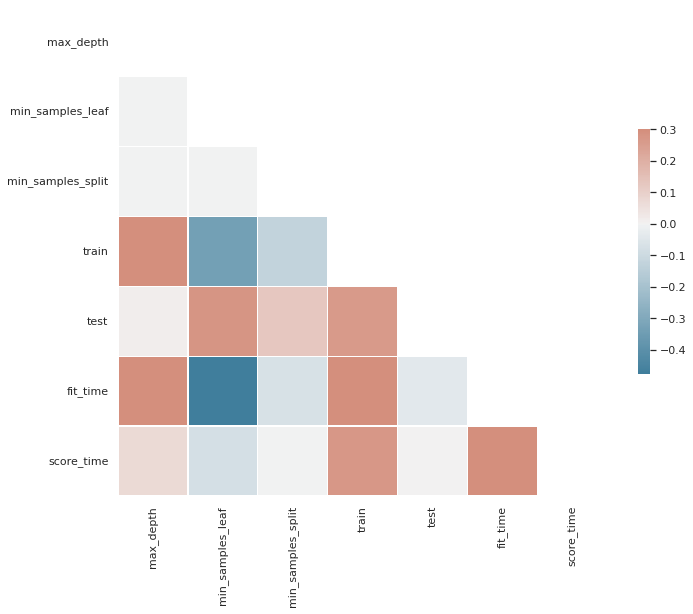

In [30]:
#Seaborn Correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = "white");

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool));

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9));

#Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True);

#Draw the heatmap with the mask and corerct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5});

In [31]:
result.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
45,3,256,64,78.750993,78.672633,0.011278,0.001990
41,3,128,64,78.750993,78.672633,0.011755,0.002046
48,4,32,32,78.750993,78.672633,0.013688,0.002055
47,3,256,256,78.750993,78.672633,0.011273,0.002079
46,3,256,128,78.750993,78.672633,0.011557,0.001936


# **GridSearchCV**

In [35]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

space_param = {
    'max_depth': [3,5],
    'min_samples_leaf': [32, 64, 128],
    'min_samples_split': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                      space_param,
                      cv = GroupKFold(n_splits = 10))
search.fit(x_sort, y_sort, groups = data.model)

results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032559,0.019771,0.007037,0.005561,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.014336,0.000814,0.002996,0.000740,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.015804,0.005085,0.002967,0.000928,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.015041,0.002497,0.002730,0.000300,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.028507,0.013799,0.005286,0.003197,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [37]:
print(search.best_params_)
print(search.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [38]:
best = search.best_estimator_
best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [40]:
from sklearn.metrics import accuracy_score

prediction = best.predict(x_sort)
accuracy = accuracy_score(prediction, y_sort) * 100
print('Accuracy for the data was %.2f%%' % accuracy)

Accuracy for the data was 78.75%


# **Nested Cross Validation**

In [43]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

space_param = {
    'max_depth': [3,5],
    'min_samples_leaf': [32, 64, 128],
    'min_samples_split': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                      space_param,
                      cv = KFold(n_splits = 5, shuffle = True))

search.fit(x_sort, y_sort)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011628,0.002800,0.002092,0.000191,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010131,0.000362,0.002127,0.000328,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.010491,0.000465,0.002125,0.000202,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010745,0.001030,0.002291,0.000386,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010349,0.000206,0.002101,0.000087,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(search, x_sort, y_sort, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [45]:
def print_scores(scores):
  media = scores.mean() * 100
  deviation = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Interval [%2.f, %.2f]" % (media - 2 * deviation, media + 2 * deviation))

print_scores(scores)

Accuracy media 78.67
Interval [77, 80.54]


In [46]:
best = search.best_estimator_
best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

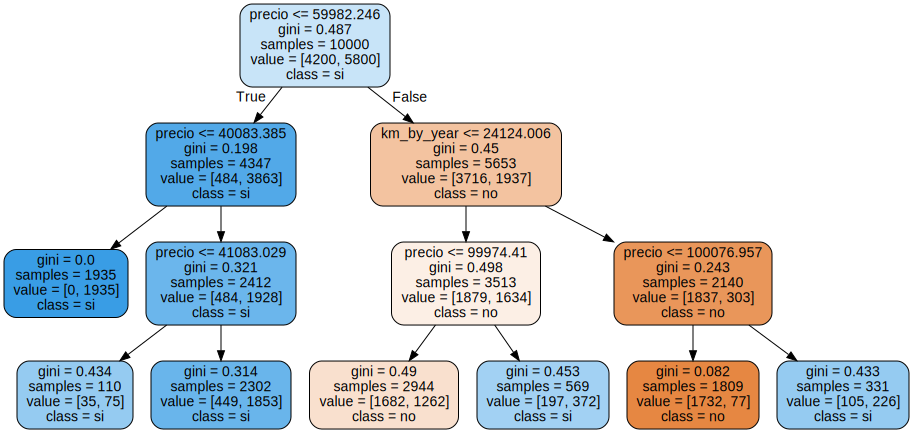

In [47]:
features = x_sort.columns
dot_data = export_graphviz(best, out_file = None, filled = True, rounded = True, class_names =['no', 'si'], feature_names = features)

graph = graphviz.Source(dot_data)
graph